In [10]:
# DATA PREPROCESSING

In [3]:
import pandas as pd
import numpy as np
from matplotlib import rcParams
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("../data/indian_liver_patient.csv")

In [5]:
print("\nFirst 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3        

In [6]:
print(f"\nShape of the dataset (rows, columns): {data.shape}")


Shape of the dataset (rows, columns): (583, 11)


In [35]:
missing_values = data.isnull().sum()
print(missing_values)

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


In [9]:
mode_value = data['Albumin_and_Globulin_Ratio'].mode()[0]
data['Albumin_and_Globulin_Ratio'].fillna(mode_value, inplace=True)


C:\Users\sahas\AppData\Local\Temp\ipykernel_20500\3434946936.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Albumin_and_Globulin_Ratio'].fillna(mode_value, inplace=True)


In [10]:
print("\nMissing values per column:")
missing_values = data.isnull().sum()
print(missing_values)


Missing values per column:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


In [11]:
print("\nConcise summary of the DataFrame (df.info()):")
data.info()


Concise summary of the DataFrame (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [12]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947427,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318522,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [13]:
# names of all columns
print("\nColumn names:")
print(data.columns.tolist())


Column names:
['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset']


C:\Users\sahas\AppData\Local\Temp\ipykernel_20500\1069780326.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


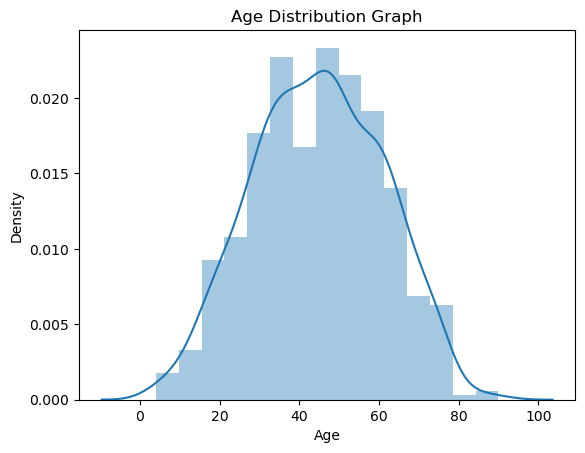

In [14]:
sns.distplot(data['Age'])
plt.title("Age Distribution Graph")
plt.show()

In [15]:
print(data.columns)


Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')


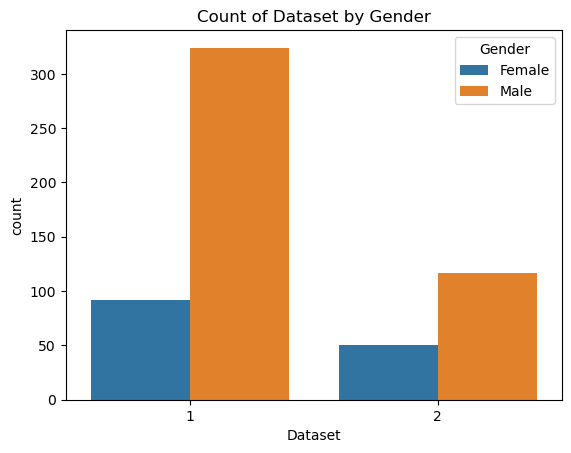

In [16]:
sns.countplot(x='Dataset', hue='Gender', data=data)
plt.title("Count of Dataset by Gender")
plt.show()

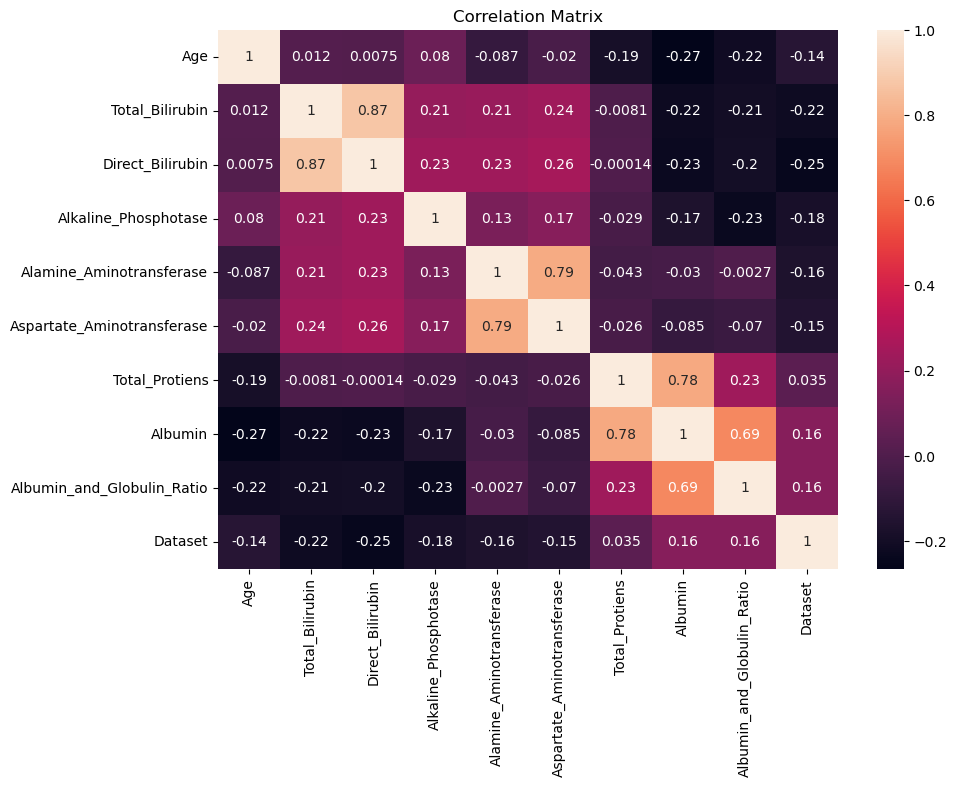

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

In [18]:
#Numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
print("\nNumerical columns:")
print(numerical_cols)


Numerical columns:
['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset']


In [19]:
#Categorical columns
categorical_cols = data.select_dtypes(include='object').columns.tolist()
print("\nCategorical columns:")
print(categorical_cols)


Categorical columns:
['Gender']


Outlier Detection (using Box Plots)


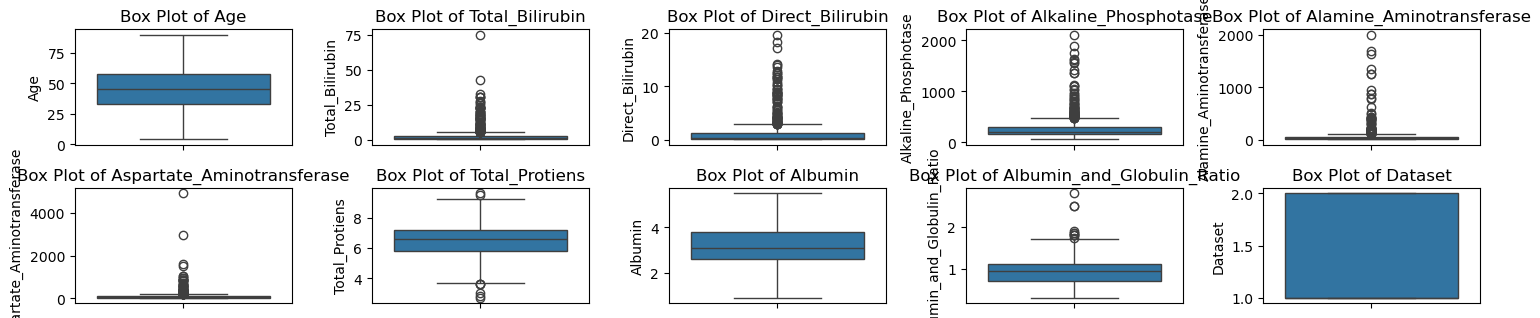

In [20]:
print("Outlier Detection (using Box Plots)")

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


Pairplot (Scatter plots for numerical columns):


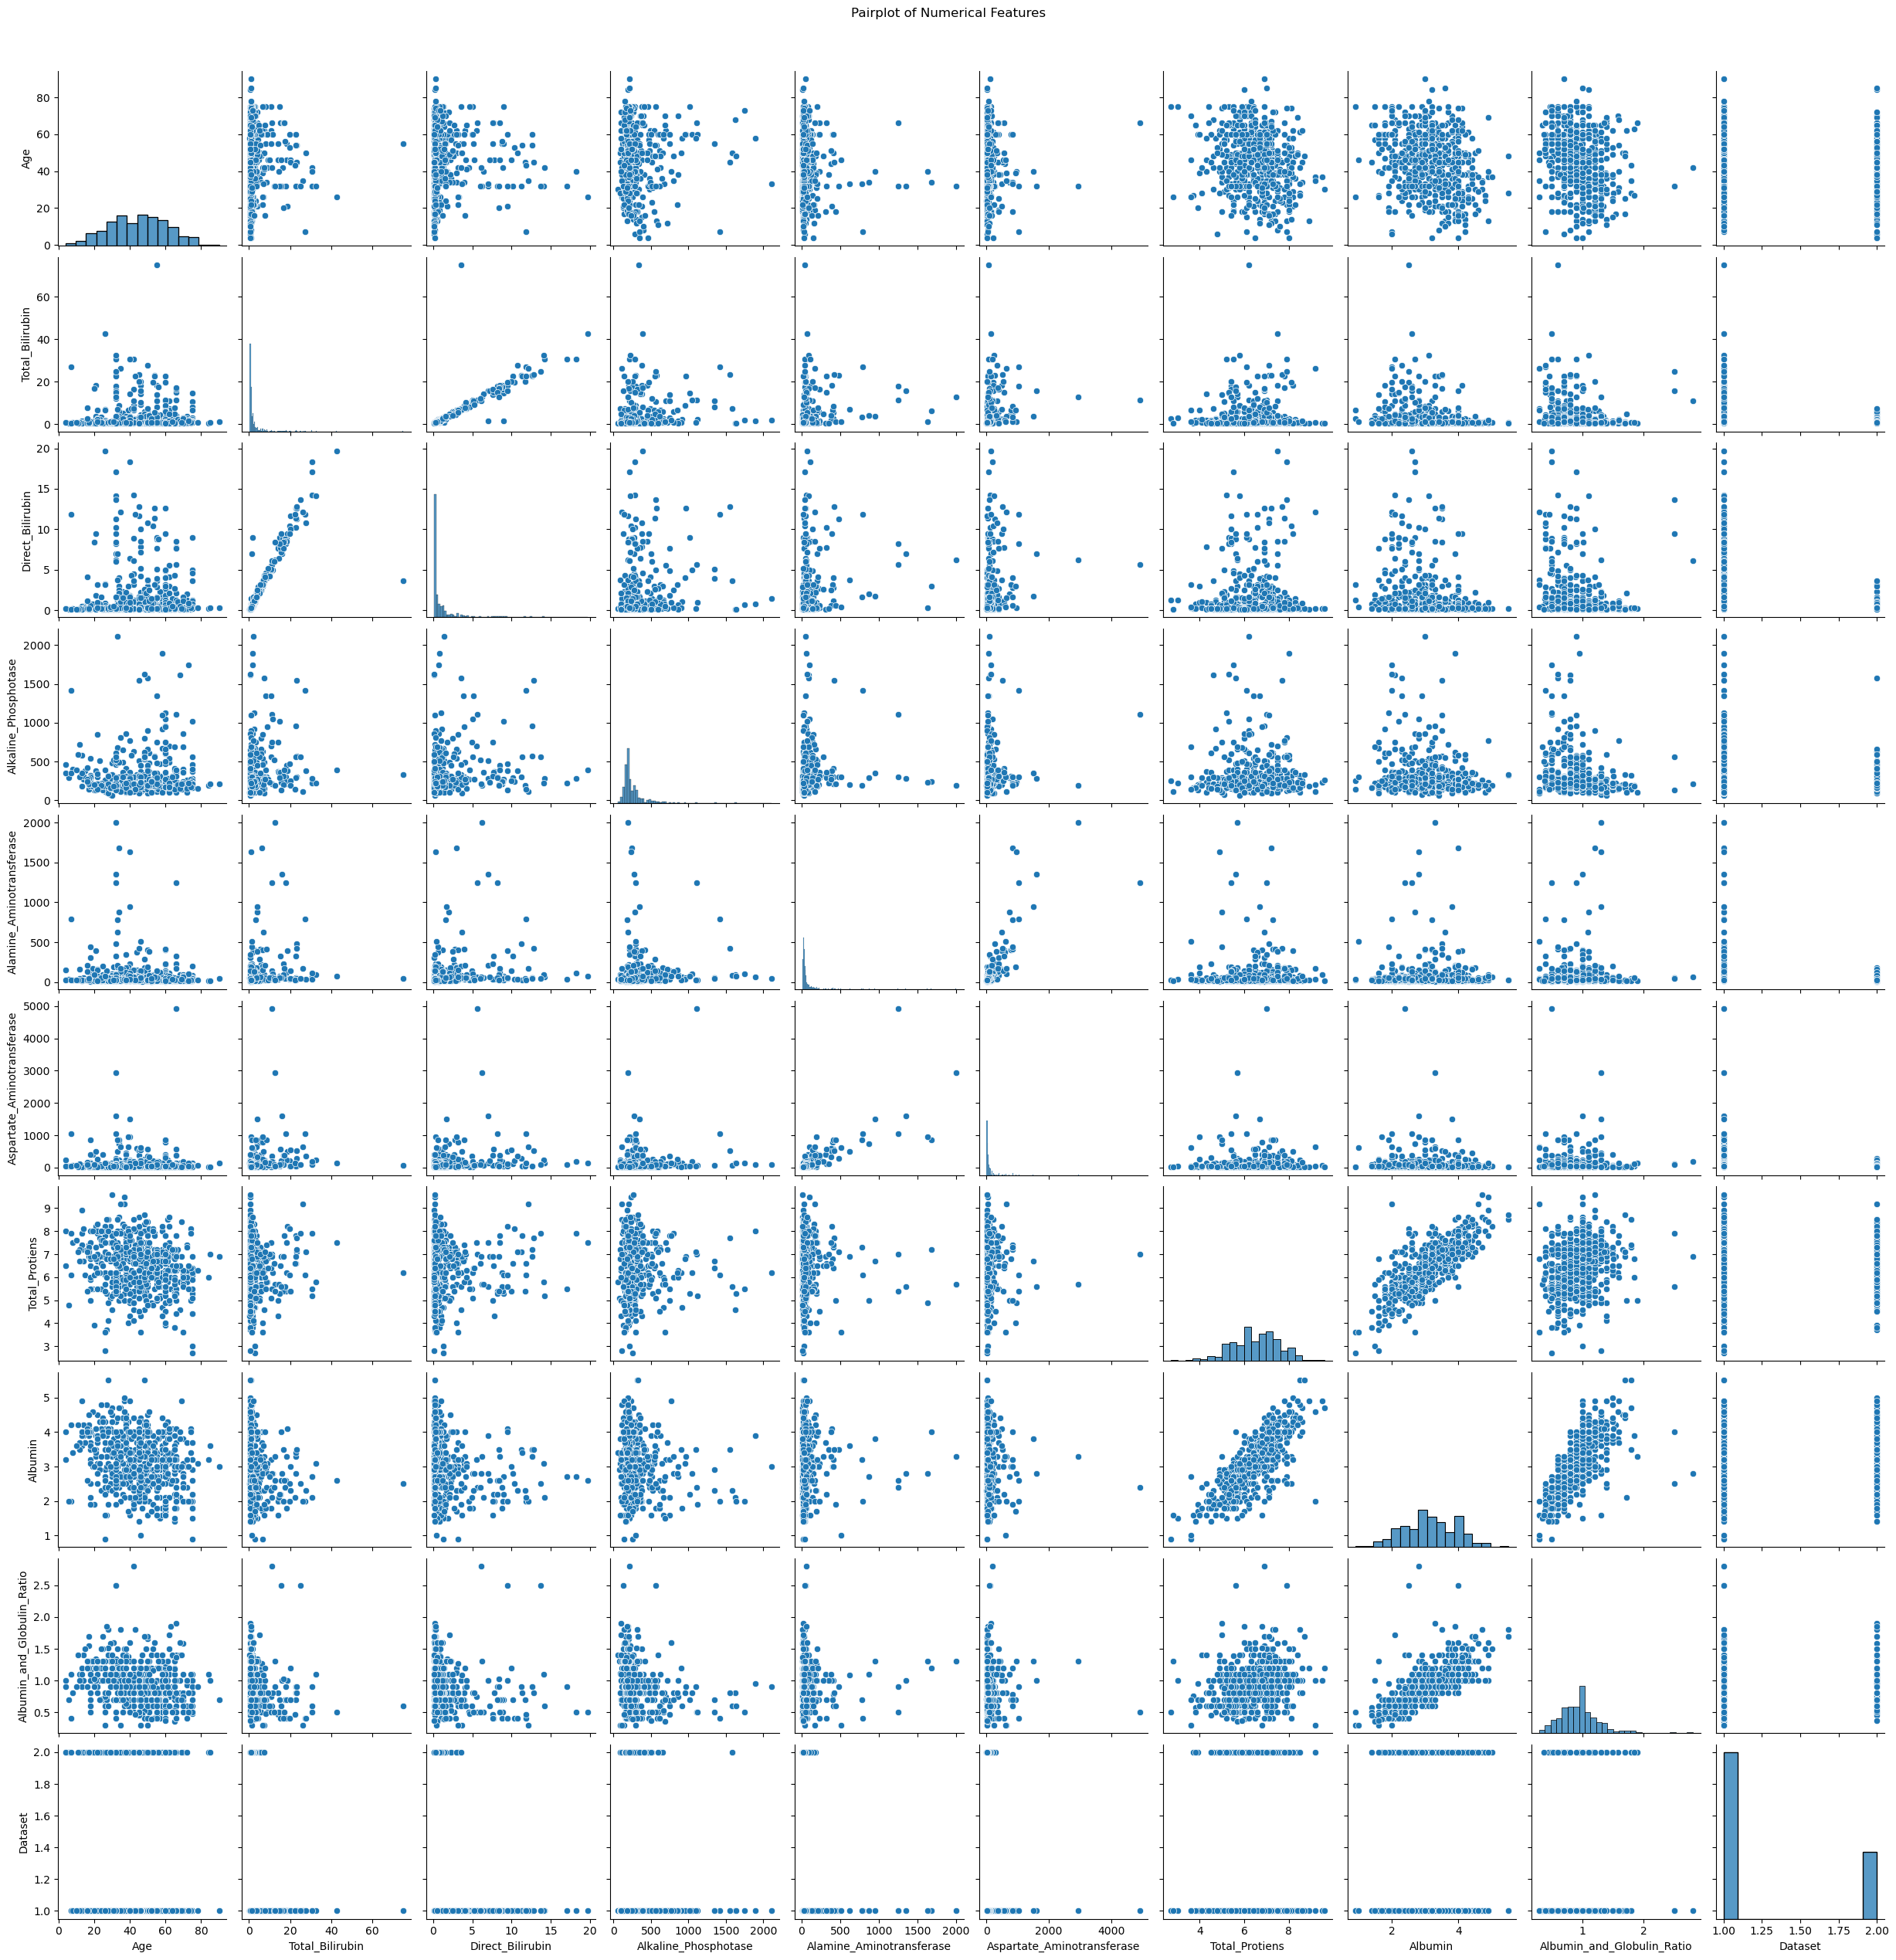

In [21]:
print("\nPairplot (Scatter plots for numerical columns):")
sns.pairplot(data[numerical_cols])
plt.suptitle('Pairplot of Numerical Features', y=1.02) # Add a title to the pairplot
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

In [23]:
X=data.iloc[:,0:-1]
Y=data.iloc[:,-1]

In [24]:
from sklearn.preprocessing import scale
X_scaled=pd.DataFrame(scale(X),columns=X.columns)

In [25]:
X_scaled.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,-1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.149025
1,1.066637,0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.651777
2,1.066637,0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.180447
3,0.819356,0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.165194
4,1.684839,0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.720124


In [26]:
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=1)

In [27]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
smote = SMOTE()
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)

x_train_smote, y_train_smote = smote.fit_resample(x_train_imputed, y_train)

In [28]:
y_train_smote.value_counts()

Dataset
1    333
2    333
Name: count, dtype: int64

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
model1 = KNeighborsClassifier()
model1.fit(x_train_smote, y_train_smote)
y_predict = model1.predict(x_test)
knn1 = (accuracy_score(y_test, y_predict))
knn1
pd.crosstab(y_test, y_predict)
print("\nClassification Report:")
print(classification_report(y_test, y_predict))
print("\nConfusion Matrix:")
print(pd.crosstab(y_test, y_predict)) 



Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.57      0.64        83
           2       0.32      0.50      0.39        34

    accuracy                           0.55       117
   macro avg       0.53      0.53      0.52       117
weighted avg       0.61      0.55      0.57       117


Confusion Matrix:
col_0     1   2
Dataset        
1        47  36
2        17  17


c:\Users\sahas\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [33]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(x_train_smote, y_train_smote)
y_predict = model2.predict(x_test)
logi1 = accuracy_score(y_test, y_predict)
logi1
pd.crosstab(y_test, y_predict)
print("\nClassification Report:")
print(classification_report(y_test, y_predict))
print("\nConfusion Matrix:")
print(pd.crosstab(y_test, y_predict)) 


Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.58      0.68        83
           2       0.41      0.71      0.52        34

    accuracy                           0.62       117
   macro avg       0.62      0.64      0.60       117
weighted avg       0.71      0.62      0.63       117


Confusion Matrix:
col_0     1   2
Dataset        
1        48  35
2        10  24


c:\Users\sahas\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
